# **Part 1: Import Libraries & Load Dataset**

In [1]:
# -----------------------------------------
# PART 1: Import libraries and load CIFAR-10
# -----------------------------------------

import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalize pixel values to [0, 1]
x_train, x_test = x_train / 255.0, x_test / 255.0

# Show dataset shape
print("Training shape:", x_train.shape)
print("Testing shape:", x_test.shape)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step
Training shape: (50000, 32, 32, 3)
Testing shape: (10000, 32, 32, 3)


# **Part 2: Define CNN Model**

In [2]:
# -----------------------------------------
# PART 2: Define a simple CNN model
# -----------------------------------------

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes
])

model.summary()  # Show model architecture


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

# **Part 3: Compile and Train the Model**

In [3]:
# -----------------------------------------
# PART 3: Compile and train the model
# -----------------------------------------

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 41ms/step - accuracy: 0.3634 - loss: 1.7126 - val_accuracy: 0.5555 - val_loss: 1.2300
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.5762 - loss: 1.1959 - val_accuracy: 0.6288 - val_loss: 1.0519
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 41ms/step - accuracy: 0.6455 - loss: 1.0174 - val_accuracy: 0.6466 - val_loss: 1.0020
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 84s 42ms/step - accuracy: 0.6833 - loss: 0.8974 - val_accuracy: 0.6803 - val_loss: 0.9279
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 51ms/step - accuracy: 0.7095 - loss: 0.8308 - val_accuracy: 0.6779 - val_loss: 0.9271
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 67s 41ms/step - accuracy: 0.7279 - loss: 0.7763 - val_accuracy: 0.7087 - val_loss: 0.8466
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 43ms/step - accuracy: 0.7508 - loss: 0.7203 - val_accuracy: 0.6896 - val_loss: 0.9039
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 66s 42ms/step - accuracy: 0.7639 -

# **Part 4: Evaluate the Model**

313/313 - 3s - 10ms/step - accuracy: 0.7145 - loss: 0.8645
Test Accuracy: 0.7145000100135803


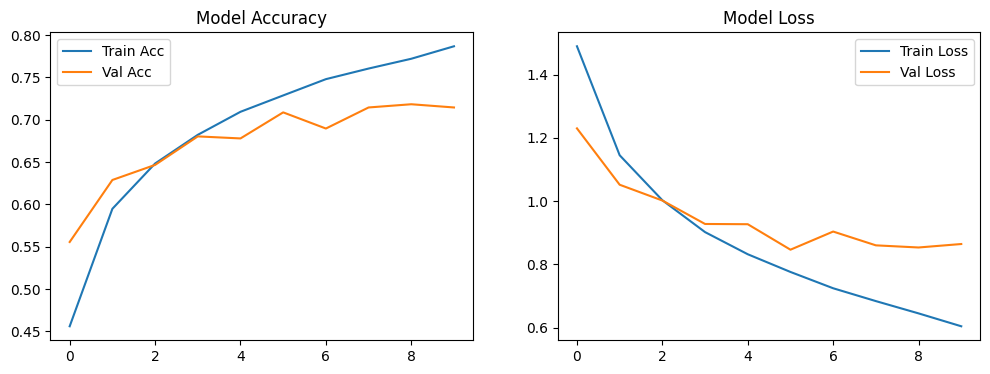

In [4]:
# -----------------------------------------
# PART 4: Evaluate and visualize performance
# -----------------------------------------

# Evaluate accuracy and loss
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test Accuracy:", test_acc)

# Plot accuracy & loss curves
plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Model Accuracy")

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Model Loss")

plt.show()

# **Part 5: Classification Report and Confusion Matrix**

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step

Classification Report:

              precision    recall  f1-score   support

           0       0.71      0.78      0.74      1000
           1       0.78      0.86      0.82      1000
           2       0.55      0.68      0.61      1000
           3       0.53      0.55      0.54      1000
           4       0.74      0.59      0.66      1000
           5       0.67      0.57      0.62      1000
           6       0.75      0.83      0.79      1000
           7       0.83      0.71      0.76      1000
           8       0.81      0.82      0.81      1000
           9       0.83      0.76      0.79      1000

    accuracy                           0.71     10000
   macro avg       0.72      0.71      0.71     10000
weighted avg       0.72      0.71      0.71     10000



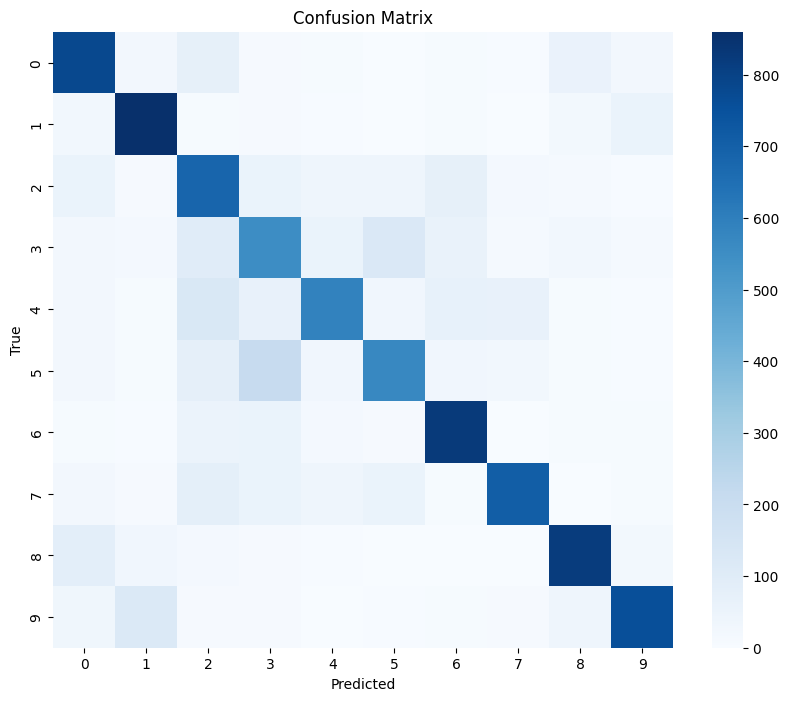

In [5]:
# -----------------------------------------
# PART 5: Confusion matrix and report
# -----------------------------------------

# Predict labels
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

# Classification Report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred_classes))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=False, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# **Show Images with Labels from CIFAR-10**

## **Step 1: Display a Single Image**

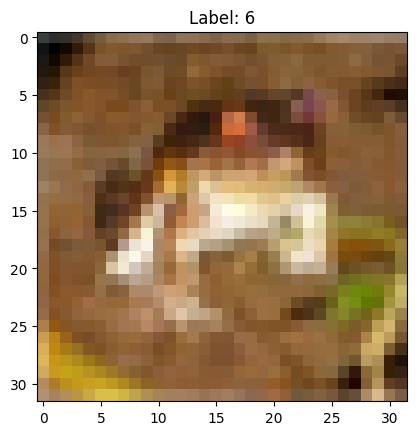

In [6]:
import matplotlib.pyplot as plt

# Display the first image in the training dataset
plt.imshow(x_train[0])
plt.title(f"Label: {y_train[0][0]}")
plt.show()


## **Step 2: Display Multiple Images with Class Names**

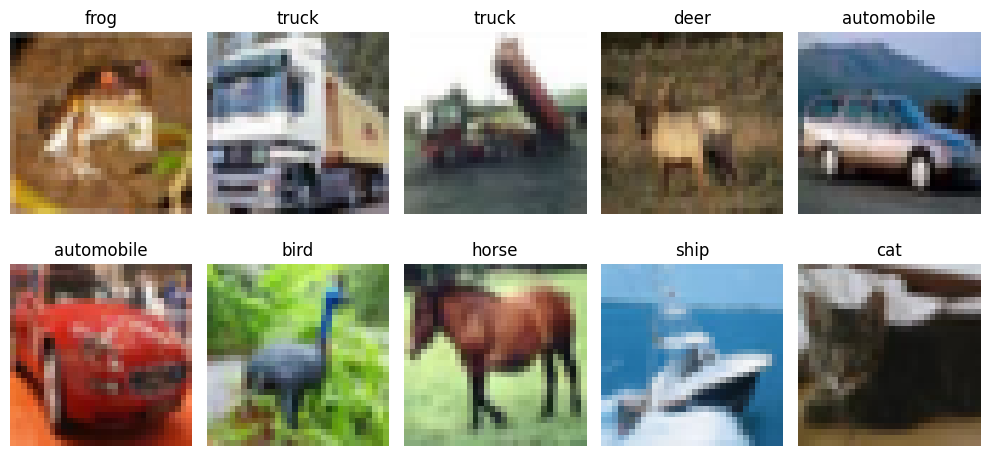

In [7]:
# CIFAR-10 class labels
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

# Display first 10 training images
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.tight_layout()
plt.show()


## **Step 3: Display Predictions with Images**

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


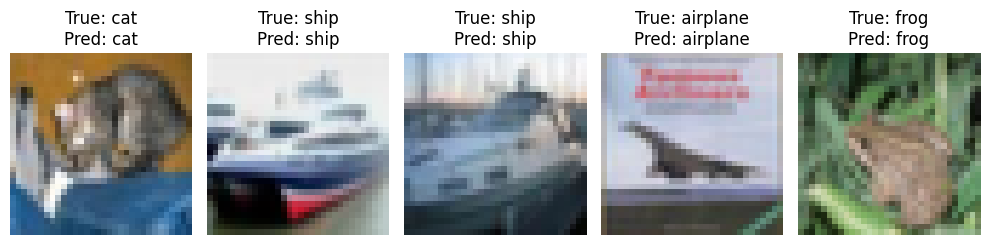

In [8]:
# Predict on test images
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Display 5 test images with predictions
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i])
    true_label = class_names[y_test[i][0]]
    pred_label = class_names[y_pred_classes[i]]
    plt.title(f"True: {true_label}\nPred: {pred_label}")
    plt.axis('off')
plt.tight_layout()
plt.show()
